In [3]:
# !wget http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Video_Games_5.json.gz
# !gzip -d -k Video_Games_5.json.gz

In [25]:
import pandas as pd
import numpy as np

In [11]:
df = pd.read_json('Video_Games_5.json', orient='records', lines=True)
df.shape

(497577, 12)

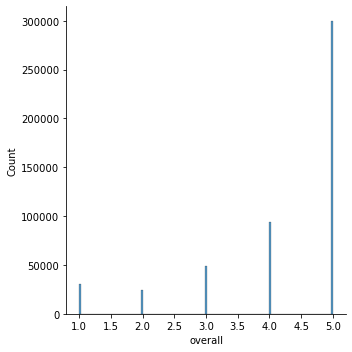

In [56]:
sns.displot(df['overall'])

In [12]:
df_no3 = df[df['overall'].isin([1,2,4,5])]
print(df_no3.shape)
df_no3.head(3)

(448431, 12)


,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000,NaN,NaN,NaN
1,4,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200,NaN,NaN,NaN
3,2,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400,NaN,NaN,NaN


In [41]:
dict_class = {
    1 : 0,
    2 : 0,
    4 : 1,
    5 : 1
}

# map reviews to sentiment classification
df_no3['sentiment'] = df_no3['overall'].map(dict_class)
df_no3['rev_sum'] = df_no3['summary'] + ' ' + df_no3['reviewText']
# df_no3.head(3)

# get only relevant columns
df_games = pd.DataFrame()
df_games = df_no3[['rev_sum', 'sentiment']]
df_games.shape

/tmp/ipykernel_291/2452910105.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no3['sentiment'] = df_no3['overall'].map(dict_class)
/tmp/ipykernel_291/2452910105.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no3['rev_sum'] = df_no3['summary'] + ' ' + df_no3['reviewText']


(448431, 2)

In [45]:
from sklearn.model_selection import train_test_split

X_game, y_game = df_games['rev_sum'], df_games['sentiment']

X_train, X_temp, y_train, y_temp = train_test_split(X_game, y_game, test_size=0.2, train_size = 0.8, stratify=y_game)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, train_size = 0.5, stratify=y_temp)

In [46]:
X_train.shape, X_dev.shape, X_test.shape

((358744,), (44843,), (44844,))